### Ensemble
Bagging - Random Forest - Multiple decision Trees are created paralllely and majority voting is done

### 1. Random Forest

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion


In [4]:
import pandas as pd
df = pd.read_csv("train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


### Target - loan_status

0 - Loan Rejected

1 - Loan Approved

### Step 2 - Perform basic data quality checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [6]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Seperate X and Y(loan_status)

In [8]:
X = df.drop(columns=["id", "loan_status"])
Y = df[["loan_status"]]

In [9]:
X.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [10]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [11]:
Y.value_counts()

loan_status
0              50295
1               8350
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

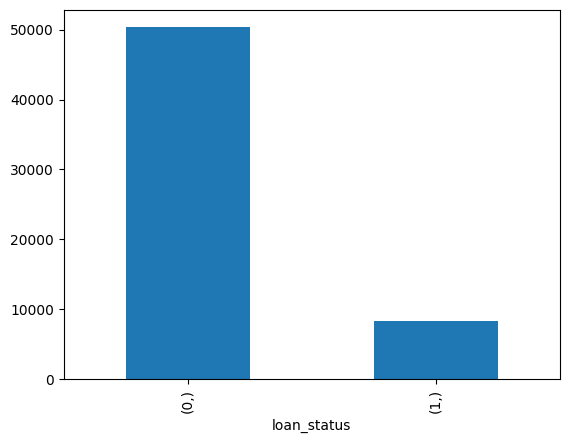

In [12]:
Y.value_counts().plot(kind="bar")

### Step 4 - Apply preprocessing on X

In [13]:
X.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [14]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [15]:
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [16]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [18]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [19]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)    
)

In [20]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [21]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 5 - Train Test split

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [23]:
xtrain.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
14337,1.400450,-0.370311,-1.187200,-0.362625,1.045295,-0.209808,2.279989,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091305,-0.549585,-0.429576,-0.758041,0.323635,-0.427932,0.790845,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422806,0.156966,-1.187200,-0.218837,-0.921970,-0.536994,-0.698298,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55811,1.897701,0.288785,-0.682117,1.039305,-1.363533,0.444564,1.287227,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40120,-0.920057,-0.486311,0.075506,-0.937775,-0.994465,-0.755118,-0.946489,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
ytrain.head()

,loan_status
14337,0
17117,0
32590,0
55811,0
40120,0


In [25]:
xtest.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
4657,-0.754307,-0.633949,-1.187200,-0.991696,-0.882427,-0.755118,-0.450108,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56440,-0.422806,-0.106673,1.085671,-0.758041,-0.688007,-0.864180,-0.450108,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42117,0.737448,0.059419,-1.187200,1.937978,0.610322,1.098935,0.046274,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10849,-0.920057,-0.897587,-1.187200,-0.758041,-0.028957,0.117378,-0.946489,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39395,-0.091305,-0.106673,-0.934659,-0.398572,0.504874,-0.427932,1.039036,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


### Step 5 - Model building

### A. Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(
    n_estimators= 1,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf= 5,
    criterion= "gini"
)

model1.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=1)

In [28]:
model1.score(xtrain, ytrain)

0.8892062409412567

In [29]:
model1.score(xtest, ytest)

0.8898456816437889

### Hyperparameter tuning

In [30]:
params = {
    "n_estimators":[50, 100, 200, 300],
    "max_depth":[2, 3, 4],
    "min_samples_split":[5, 6, 7, 8]
}


In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
base_rf = RandomForestClassifier()

rscv_rf = RandomizedSearchCV(
    estimator= base_rf,
    param_distributions= params,
    scoring= "f1_macro",
    cv = 5,
    n_jobs= -1
)

rscv_rf.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4],
                                        'min_samples_split': [5, 6, 7, 8],
                                        'n_estimators': [50, 100, 200, 300]},
                   scoring='f1_macro')

In [33]:
rscv_rf.best_params_

{'n_estimators': 300, 'min_samples_split': 7, 'max_depth': 4}

In [ ]:
rscv_rf.best_score_

np.float64(0.8414011649589419)

In [ ]:
best_rf = rscv_rf.best_estimator_
best_rf

RandomForestClassifier(max_depth=4, min_samples_split=7, n_estimators=300)

### Model Evaluation - Random Forest

In [36]:
best_rf.score(xtrain, ytrain)

0.9349475658623924

In [37]:
best_rf.score(xtest, ytest)

0.9332423906556399

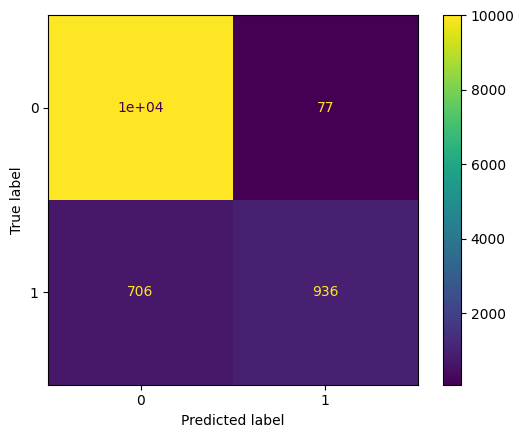

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rf, xtest, ytest)

In [39]:
ypred_test = best_rf.predict(xtest)
ypred_test[0:5]

array([0, 0, 0, 0, 0])

In [40]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [41]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10087
           1       0.92      0.57      0.71      1642

    accuracy                           0.93     11729
   macro avg       0.93      0.78      0.83     11729
weighted avg       0.93      0.93      0.93     11729



### B. Gradient boosting


In [1]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
model2 = GradientBoostingClassifier(
    n_estimators= 1,
    learning_rate= 0.8,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5
)

model2.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.8, max_depth=1, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [43]:
model2.score(xtrain, ytrain)

0.8892062409412567

In [44]:
model2.score(xtest, ytest)

0.8898456816437889

### Hyperparameter tuning

In [45]:
params2 = {
    "n_estimators": [50, 100],
    "max_depth": [2, 3, 4],
    "learning_rate": [0.1, 0.2]
}

In [46]:
base_gb = GradientBoostingClassifier()

rscv_gb = RandomizedSearchCV(
    estimator= base_gb,
    param_distributions= params2,
    scoring="f1_macro",
    cv=5,
    n_jobs= -1
)

rscv_gb.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2],
                                        'max_depth': [2, 3, 4],
                                        'n_estimators': [50, 100]},
                   scoring='f1_macro')

In [47]:
rscv_gb.best_params_

{'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2}

In [48]:
rscv_gb.best_score_

np.float64(0.8908977673843346)

In [49]:
best_gb = rscv_gb.best_estimator_
best_gb

GradientBoostingClassifier(learning_rate=0.2, max_depth=4)

### Model evaluation

In [50]:
best_gb.score(xtrain, ytrain)

0.9572214170005968

In [51]:
best_gb.score(xtest, ytest)

0.9521698354505925

In [52]:
ypred_test2 = best_gb.predict(xtest)
ypred_test2[0:5]

array([0, 0, 0, 0, 0])

In [53]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


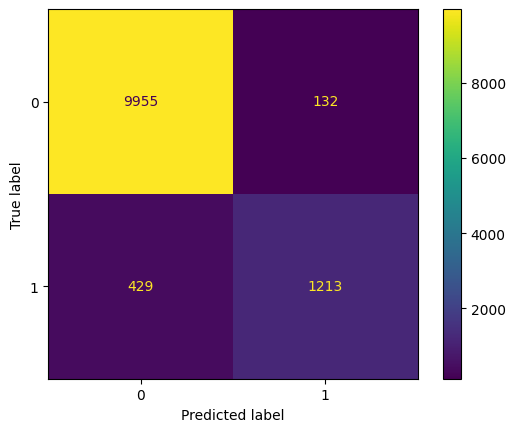

In [54]:
ConfusionMatrixDisplay.from_estimator(best_gb, xtest, ytest)

In [55]:
print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.90      0.74      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



In [56]:
imp = pd.Series(best_gb.feature_importances_, index=xtrain.columns)
imp

num__person_age                        0.007093
num__person_income                     0.075679
num__person_emp_length                 0.035804
num__loan_amnt                         0.006335
num__loan_int_rate                     0.162227
num__loan_percent_income               0.326026
num__cb_person_cred_hist_length        0.002038
cat__person_home_ownership_MORTGAGE    0.001636
cat__person_home_ownership_OTHER       0.000823
cat__person_home_ownership_OWN         0.010781
cat__person_home_ownership_RENT        0.158479
cat__loan_intent_DEBTCONSOLIDATION     0.030165
cat__loan_intent_EDUCATION             0.000449
cat__loan_intent_HOMEIMPROVEMENT       0.016422
cat__loan_intent_MEDICAL               0.029969
cat__loan_intent_PERSONAL              0.000754
cat__loan_intent_VENTURE               0.002367
cat__loan_grade_A                      0.000000
cat__loan_grade_B                      0.000748
cat__loan_grade_C                      0.016912
cat__loan_grade_D                      0

In [57]:
imp.sort_values(ascending=False)

num__loan_percent_income               0.326026
num__loan_int_rate                     0.162227
cat__person_home_ownership_RENT        0.158479
cat__loan_grade_D                      0.111249
num__person_income                     0.075679
num__person_emp_length                 0.035804
cat__loan_intent_DEBTCONSOLIDATION     0.030165
cat__loan_intent_MEDICAL               0.029969
cat__loan_grade_C                      0.016912
cat__loan_intent_HOMEIMPROVEMENT       0.016422
cat__person_home_ownership_OWN         0.010781
num__person_age                        0.007093
num__loan_amnt                         0.006335
cat__loan_grade_E                      0.003156
cat__loan_intent_VENTURE               0.002367
num__cb_person_cred_hist_length        0.002038
cat__person_home_ownership_MORTGAGE    0.001636
cat__person_home_ownership_OTHER       0.000823
cat__loan_intent_PERSONAL              0.000754
cat__loan_grade_B                      0.000748
cat__loan_intent_EDUCATION             0

<Axes: >

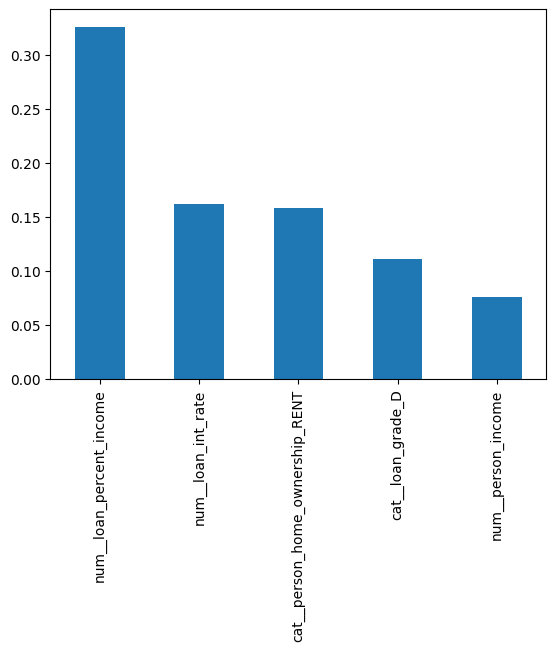

In [58]:
imp.sort_values(ascending=False)[0:5].plot(kind="bar")

### Out of sample prediction
Use gradient boost

In [59]:
xnew = pd.read_csv("test_loan.csv")
xnew.head()


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [60]:
xnew.shape

(39098, 12)

In [61]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [62]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,-0.920057,-0.865950,-0.682117,-1.117510,-0.101452,-0.646056,-0.450108,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39094,-0.920057,-0.423038,0.328047,-0.398572,-1.531591,-0.100746,-0.698298,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39095,3.886707,-0.106673,-1.187200,1.039305,-1.043894,0.989873,4.761895,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39096,-0.920057,-0.739404,-0.177035,0.859570,1.628554,2.516741,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [63]:
preds = best_gb.predict(xnew_pre)
preds[0:5]

array([1, 0, 1, 0, 0])

In [64]:
best_gb.classes_

array([0, 1])

In [65]:
probs = best_gb.predict_proba(xnew_pre)[:, 1]
probs[0:5]

array([0.9960344 , 0.02223164, 0.74626501, 0.01129895, 0.0611591 ])

### Save the results in dataframe

In [66]:
res = xnew[["id"]]
res

,id
0,58645
1,58646
2,58647
3,58648
4,58649
...,...
39093,97738
39094,97739
39095,97740
39096,97741


In [67]:
res["loan_status_pred"] = preds
res["prob"] = probs

In [68]:
res = res.round(4)

In [69]:
res

,id,loan_status_pred,prob
0,58645,1,0.9960
1,58646,0,0.0222
2,58647,1,0.7463
3,58648,0,0.0113
4,58649,0,0.0612
...,...,...,...
39093,97738,0,0.0629
39094,97739,0,0.0095
39095,97740,0,0.0122
39096,97741,0,0.2074


In [70]:
res["loan_status_pred"].value_counts()

loan_status_pred
0    34782
1     4316
Name: count, dtype: int64

<Axes: xlabel='loan_status_pred'>

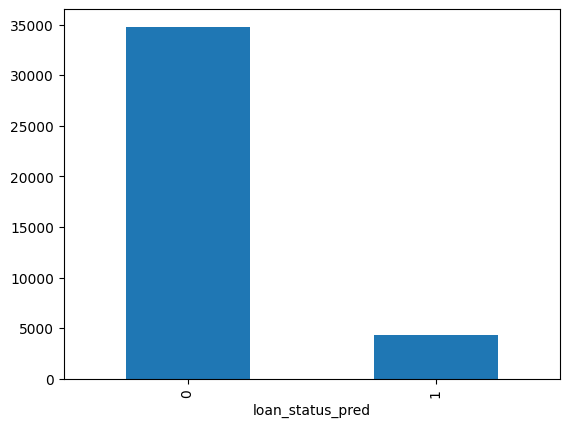

In [71]:
res["loan_status_pred"].value_counts().plot(kind="bar")

### Save the results to csv

In [72]:
res.to_csv("GBResults.csv", index=False)

### Save the gradient boost model

In [73]:
import joblib

joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [74]:
joblib.dump(best_gb, "gb_loan.joblib")

['gb_loan.joblib']

In [75]:
joblib.dump(best_gb, "gb_loan.joblib")

['gb_loan.joblib']

### Load the model objects

In [76]:
p = joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [77]:
m = joblib.load("gb_loan.joblib")
m

GradientBoostingClassifier(learning_rate=0.2, max_depth=4)